## 数据的图表展示
matplotlib提供了很多图形的绘制，但常用的就那么几种。假设我们的绘制任务是简单的，通常只需要绘制一张数据图，那便只需要掌握matplotlib的基本绘制其他用的少的现学现用。

需要掌握的内容有：

1.figure的各种属性的设置；

2.饼图、折线图、直方图、二维函数图形、三维函数图形的绘制。

### 基本图形的绘制

#### Figure,Axes和Axis,以及Artist
在matplotlib中，一个figure中可以包含多个axes，**可以认为figure是整张图，axes是figure中的一个子图**。

axes是axis的复数形式，显然一个axes中包含了多个axis，即一个axes对象中可以有多条坐标轴，两条坐标轴形成的是二维坐标系，三条坐标轴形成三维坐标系。

而Artist是画布中所有可见的对象，包括Text、Figure、Axes、Axis、Patch等

In [1]:
## 导入库
import matplotlib.pyplot as plt
import numpy as np

#### subplots

Text(0.5, 0, 'a label')

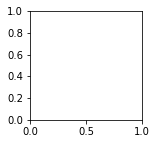

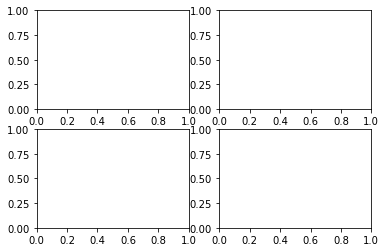

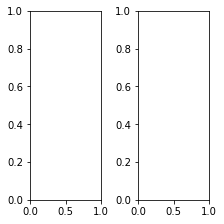

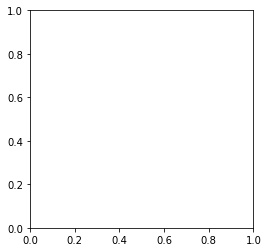

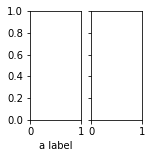

In [12]:
## 关于subplots

# subplots默认返回一个figure和一个axes，即只有一个子图
fig, ax = plt.subplots(figsize=(2,2))
# 当需要生成多个子图时，使用元组解包返回的axes
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)

# 设置参数layout='constrained'使子图的展示效果为自适应，这似乎是默认设置
# 实际上这个参数在suplots中最后会传递给figure，最后这个figure作为返回值返回
fig, (ax1,ax2) = plt.subplots(1,2, layout='constrained',figsize=(3,3))
# 也可以在figure中设置：
fig.set_constrained_layout(True)

# 指定整个figure的大小
fig, ax = plt.subplots(figsize=(4,4))
# 由于figsize最终传递给了figure对象，所以也可以直接通过fig进行设置
fig.set_size_inches(4,4)

# 设置sharex和sharey的值为True，使得全局的x轴和y轴的属性相同
fig, (ax1, ax2) = plt.subplots(1,2,sharex='all', sharey=True, figsize=(2,2))
ax1.set_xlabel('a label')

#### 数据的生成

使用numpy生成等差数列有两种方式：

方式一：使用`np.arange(start, stop, step)`，这种方式便于生成元素之差为step的数组

方式二：使用`np.linspace(start, stop, num)`，这种方式便于生成元素个数为num的数组，还可以通过endpoint参数指定元素是否包含端点。

#### 散点图绘制

D:\Development\Anaconda\envs\SciencePy\lib\site-packages\matplotlib\collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


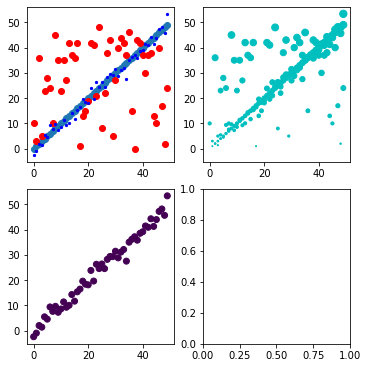

In [13]:
## 绘制散点图
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, layout='constrained', figsize=(5,5))
# 或者 fig, ax = plt.subplots() 也是一样的
a = np.arange(50)
b = np.random.randint(0,50,50)
# 使随机生成的数据在数组a的上下浮动
c = a + 2*np.random.randn(50)   # randn返回的数据服从正态分布，大小为(0,1)
d = np.array([25]*50)
# 一个一个绘制散点图，可以对每一份散点图进行diy
ax1.scatter(a, a)
ax1.scatter(a, b, c='r', linestyle='-') # 随机生成的数据
ax1.scatter(a, c, c='b', s=5) # 接近于数组a的数据

# 一起绘制多个散点图，需要注意，两个数组的shape要一致,不推荐
ax2.scatter([a,a,a],[a,b,c], c='c', s=[a,b,c])

# 或者使用字典，一次只画一个散点图
data = {'a':a, 'b':b, 'c':c, 'd':d}
ax3.scatter(x='a', y='c', c='d', data=data)
# 注意，当传入data时，前面的参数x，y，s，c，linewidths等需要为字符或字符串
# x='a'表示data['a'], c='c'表示的是data['c']


**从上面的实践中可知，对于图形的绘制，只需要操作axes对象即可（上面只操作了ax1，ax2，ax3），而figure可以不做设置。**

#### 标签、图例、文本、网格等
由于subplots中只能设置全局的属性，例如画布的大小，figure的相关属性等，当要给子图（即axes对象）添加标签时，只能单独的进行设置。

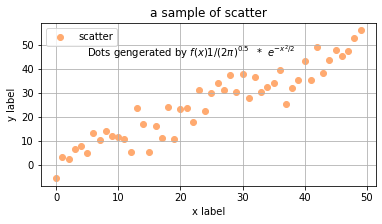

In [14]:
## 设置附加信息：标签，标题等
fig, ax = plt.subplots(figsize=(6,3))

# 先绘制一个散点图
a = np.arange(50)
b = np.random.randn(50)*5 + a

# 设置图例，在绘制散点图时传入label参数，再执行ax.legend()生成图例
ax.scatter(a, b, c='#ffaa70', label='scatter')
ax.legend()

# 设置文字，文字并不支持Latex，支持上标^，下标_，以及希腊文字，例如：\mu，\pi，这些内容需放置在$$之间
# 如果要使用LaTex，需要额外的设置，似乎挺麻烦的，最简便的方法是使用 snipaste贴图+截屏
ax.set_xlabel('x label')
ax.set_ylabel('y label')
# 设置标题
ax.set_title('a sample of scatter')
# 设置文本，其中前两个参数为坐标轴上的坐标
ax.text(5, 45, 'Dots gengerated by $f(x) {1}/(2\pi)^{0.5} \ \ *\ e^{{-x^2}/{2} } $')
# 显示网格
ax.grid(True)

#### 直线、折线绘制

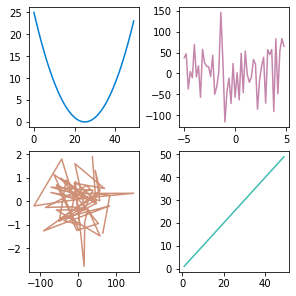

In [15]:
## 绘制折线图
import numpy as np
a = np.arange(50)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, layout='constrained', figsize=(4,4))

# 绘制折线图需要使用plot，这个函数会将所第一个数组作为横坐标，第二个数组作为纵坐标
# 两个数组相同下标的元素组合成一个坐标，代表一个点，plot将所有的点依次进行连接

# 绘制 y=x^2 ，以直代曲
t = [i*i for i in np.arange(-5,5,0.2)]
b = np.array(t)
ax1.plot(a, b, c='#007fd4')

# 绘制折线，纵坐标随机生成
c = np.random.randn(50)*50
ax2.plot((a-25)/5, c, c='#c586ac')

# 绘制杂线，横纵坐标随机生成，依次连接生成的点
d = np.random.randn(50)
ax3.plot(c, d, c='#ce9178', linestyle='-')

# 绘制一条直线需要提供两个点，这里两个点是(1,1)，(49,49)
ax4.plot([1,49],[1,49], c='#3ebcb0')


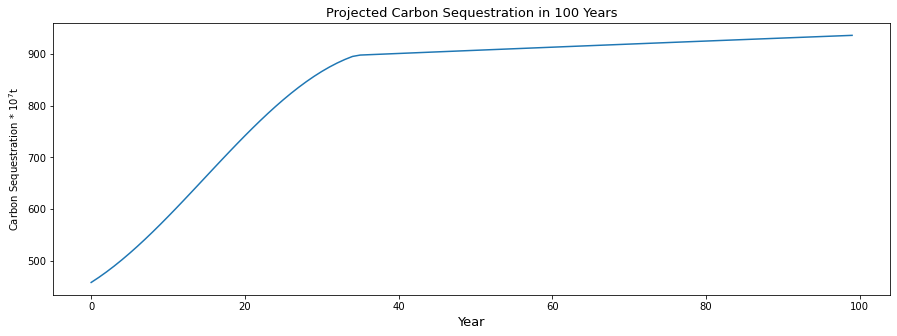

In [284]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-np.pi/2,np.pi/2, 100, endpoint=True)
a = np.linspace(1, 100, 100, endpoint=True)

# [d.append(i-np.sin(t[50])) for i in t[:50]]
# [d.append(i+np.sin(t[50])) for i in t[150:]]
b = [(np.sin(i)+1)/2 for i in t]
bias = 20
c = []
[c.append(b[i+bias]) for i in range(len(b[bias:90])) if i%2==0]
[c.append(np.log(i+1.5)+0.135) for i in np.linspace(np.pi*0.26, 1, 100-len(c),endpoint=True)]
c = [i*500+410 for i in c]
d  = np.arange(len(c))

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Carbon Sequestration * $10^7$t', fontsize=10)
ax.set_title('Projected Carbon Sequestration in 100 Years', fontsize=13)
ax.plot(d, c)

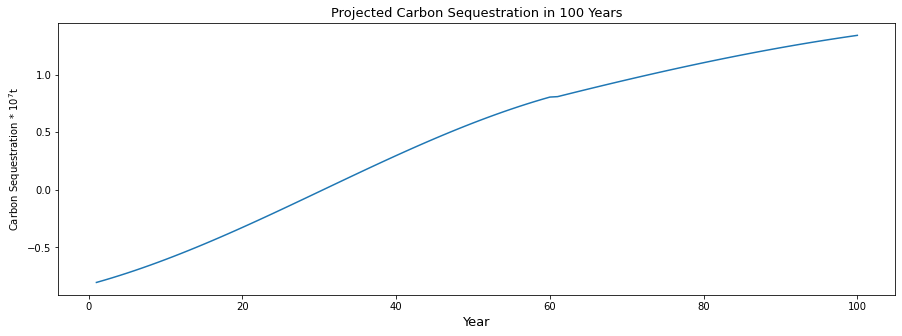

In [244]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-np.pi/2,np.pi/2, 100, endpoint=True)
a = np.linspace(1, 100, 100, endpoint=True)
d  = [np.sin(x) for x in t]

e = d[20:80]
[e.append(np.sin(x)+0.5) for x in np.linspace(0.1*np.pi, 1, 40)]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Carbon Sequestration * $10^7$t', fontsize=10)
ax.set_title('Projected Carbon Sequestration in 100 Years', fontsize=13)
ax.plot(a,e)

#### 饼图绘制

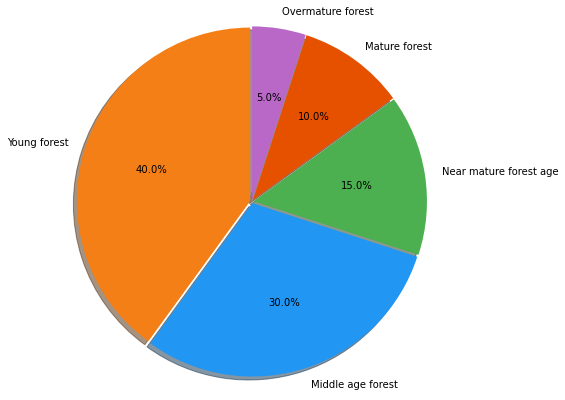

In [26]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Young forest","Middle age forest","Near mature forest age","Mature forest","Overmature forest"
sizes = [40, 30, 15, 10, 5]
# colors = ["#7ddcfe","#c586c0","#95cea8","#ce9178","#6a9955"]
colors = "#f57f17","#2196f3","#4caf50","#e65100","#ba68c8"

from matplotlib.pylab import mpl
explode = (0.01, 0.01, 0.01, 0.01,0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')
mpl.rcParams['axes.labelsize'] ='xx-large'

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# print(mpl.rcParams.keys())
plt.show()

#### 直方图
区分hist和bar

TypeError: bar() missing 1 required positional argument: 'height'

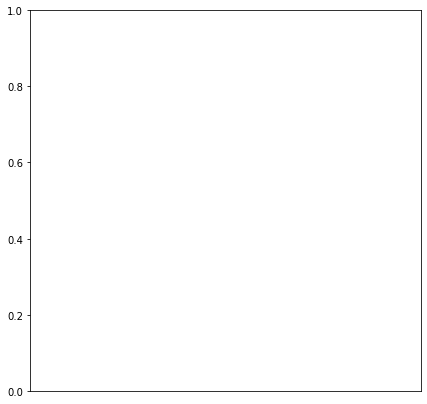

In [90]:
import matplotlib.pyplot as plt
c = [1, 2, 3, 4]
a = [0.44, 0.37, 0.14, 0.05]
b = ["Agribusiness", "Logging", "Government", "Turism"]
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xticks([])
# ax.bar(b,a)
for  data,index,label in zip(a,c,b):
    d = [0, 0, 0, 0]
    d[index-1] = data
    # ax.hist(d,bins=c, label=label)
    ax.bar(c, d, label=label)
ax.legend()

AttributeError: 'Rectangle' object has no property 'normed'

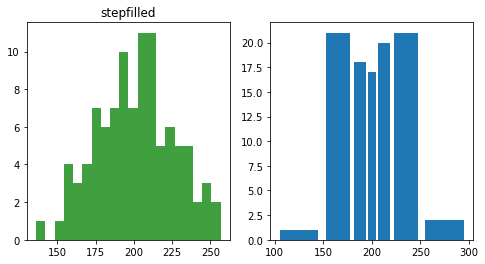

In [70]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

fig.tight_layout()
plt.show()

### 三维图形绘制
有两种方式可以创建三维坐标
第一种方式向figure对象中添加三维坐标，使用add_subplot函数，但由于每次使用add_subplot函数便会覆盖之前绘制的图像，所以这种方式一次只能绘制一个三维坐标
```python
fig = plt.figure()
add_subplot(projection='3d')
```

第二种方式是使用subplots函数，需要传入参数`subplot_kw={"projection": "3d"}`，这个参数最终会传递给figure对象。使用这种方式可以绘制多个三维坐标
```python
fig, (ax1,ax2) = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
```

#### 绘制曲线&参数方程
曲线的绘制都是以直代曲，即用一段段直线段相连来表示曲线，三维曲线也是如此，所以绘制三维曲线需要提供一组三维坐标，在使用matplotlib绘制时，这一组三维坐标分为三组，分别代表各个点在三个维度上的取值。

在使用matplotlib绘制时，使用只含有一个参数的方程组的形式便于生成三个维度的点。例如：
 \begin{cases}
 x = sin(t) \\
 y = cos(t) \\
 z = t^2
\end{cases}
此时可以通过如下方式生成曲线上的点:
```python
t = np.arange(-5, 5, 0.5)
x = np.sin(t)
y = np.cos(t)
z = t*t
```
但有时候三维曲线的形式是两个曲面的交线，例如：
\begin{cases}
 \frac{x^2}{9} - \frac{y^2}{4}  = z ,\\
 x^2- y = z \space \space 
\end{cases}
这个时候需要得到它的参数方程形式，可以用最简便的方式：

step1：先消去变量z，得到曲线在XOY平面上的投影，即x和y的方程
\begin{align*}
\frac{3}{4}*x^2 = \sqrt{y-\frac{y^2}{9} } 
\end{align*}
step2：将x或y作为参数，这里取y为参数，再用y来表示x，得
\begin{align*}
x = \pm \sqrt{\frac{4}{3}(y-\frac{y^2}{9})  } 
\end{align*}
如果令t=y，则x和y之间的参数方程为
\begin{cases}
x = \pm \sqrt{\frac{4}{3}(t-\frac{t^2}{9})  }, \\
y = t \space  \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space 
\end{cases}

step3：接着再用x和y来表示z，注意，此时$x=x(t);y=y(t)$，所以z可以用t来表示，由两个曲面方程，得
\begin{cases}
 z = x^2 - y \\
 或 \\
z=\frac{x^2}{4} -\frac{y^2}{9} 
\end{cases}
此时，便得到了该曲线的参数方程
\begin{cases}
x = \pm \sqrt{\frac{4}{3}(t-\frac{t^2}{9})  }, \\
y = t \\
z = x(t)^2 - y(t) 
\end{cases}

再例如：
\begin{cases}
x^2 + y^2 = 25 \\
x + y + z = 0
\end{cases}
第一个方程表示圆，可以轻易的得到它的参数方程：
\begin{cases}
x = sin(t)
y = cos(t)
\end{cases}
再用$x(t)和y(t)$来表示z，由$x + y + z = 0$得
\begin{cases}
x = sin(t) \\
y = cos(t) \\
z = -x(t) - y(t)
\end{cases}



C:\Users\DELL\AppData\Local\Temp/ipykernel_1564/3855888573.py:16: RuntimeWarning: invalid value encountered in power
  x = np.power( 4/3*(t-np.power(t,2)/9), 0.5)


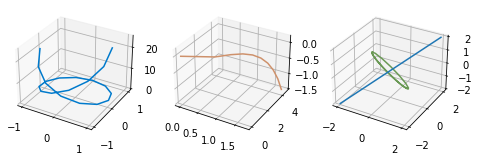

In [18]:
# 曲线的绘制

import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4), subplot_kw={"projection": "3d"})

# 第一条曲线
t = np.arange(-5, 5, 0.5)
x = np.sin(t)
y = np.cos(t)
z = t*t
ax1.plot(x, y, z, c='#007acc')

# 第二条曲线， 这里仅绘制x>0的区域
x = np.power( 4/3*(t-np.power(t,2)/9), 0.5)
y = t
z = np.power(x, 2) - y

ax2.plot(x, y, z, c= '#ce916b')

# 第三条曲线
x = np.sin(t)
y = np.cos(t)
z = - x - y
ax3.plot(x, y, z, c='#6a9955', label='circle')
# 直线的绘制，只需要提供两个点在三个坐标上的取值
ax3.plot([-2,2], [-2, 2], [-2, 2], label='line')

ax.legend()

plt.show()

#### 绘制曲面
matplotlib可以绘制多种曲面，暂时掌握用plot_surface来绘制曲面就足够了
下面绘制的曲面有：马鞍面，平面，方程如下：
\begin{align*}
\frac{x^2}{4} - \frac{y^2}{9} = z  和 x+y+z=0
\end{align*}

在绘制的过程中需要先生成XOY平面上的二维网格
```python
x = np.arange(-5, 5, 0.5) # 共 10/0.5 = 20个点
y = np.arange(-3, 3, 0.3) # 共 6/0.3 = 20个点
X, Y = np.meshgrid(x, y)  # 二维网格的大小为20*20，X和Y的shape为(20, 20) ！！！
```
X即二维网格的所有点在x轴上的取值，Y即二维网格上所有点在y轴上的取值，再根据曲面方程生成z轴坐标，最后使用plot_surface函数进行绘制
```python
Z = np.power(X, 2)/4 - np.power(Y, 2)/9
surf = ax1.plot_surface(X, Y, Z, linewidth=0, cmap=cm.coolwarm, antialiased=False)
plt.show()
```
传递给plot_surface函数的三个参数X,Y,Z也就是将要绘制的点在三个坐标上的取值（需要注意X和Y是二维数组！！！），所以可以认为传递给plot_surface函数的其实也是一系列的点，**matplotlib中绘制面的基本思想也是以直代曲，即用平面代替曲面！！！**plot_surface函数会将相邻的三个点组成一个平面，即将平面作为图元，一个个平面组合成曲面。

生成网格还有另一种方式，极坐标网格：
```python
radii = np.linspace(0.125, 1.0, 8)
angles = np.linspace(0, 2*np.pi, 36, endpoint=False)[..., np.newaxis] # 包含端点

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
```
自然的，这种网格更适合极坐标方程，可以用plot_trisurface函数进行绘制，而前一种方式适合使用plot_surface函数进行绘制。


C:\Users\DELL\AppData\Local\Temp/ipykernel_1564/2827925031.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


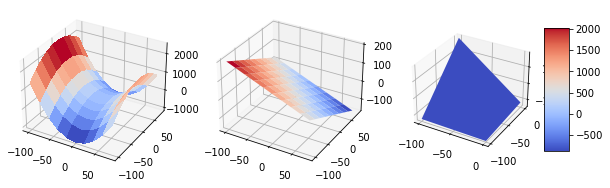

In [20]:
# 绘制曲面

# 曲面的颜色可以通过cm来设定，如暖色调cm.coolwarm
from matplotlib import cm

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(10,5),subplot_kw={"projection": "3d"})

# 绘制马鞍面
x = np.arange(-100, 100, 20) # x轴方向有 200/20 = 10 个点
y = np.arange(-100, 100, 20) # y轴方向也有10个点
# 网格总共有200*200个点，X、Y分别是这些点的横纵坐标，所以X和Y的shape都是(10,10)
X, Y = np.meshgrid(x,y)
Z = np.power(X, 2)/4 - np.power(Y, 2)/9
surf = ax1.plot_surface(X, Y, Z, linewidth=0, cmap=cm.coolwarm, antialiased=False)

# 绘制平面
Z = - X - Y
ax2.plot_surface(X, Y, Z, cmap=cm.coolwarm)
# ax2.plot_trisurf(X, Y, Z)

# 绘制杂面，Z轴坐标随机生成
x = np.arange(-100, 100, 100)
y = np.arange(-100, 100, 100) 
X, Y = np.meshgrid(x, y)
Z =np.reshape( np.random.randn(2*2)*20, (2, 2))
ax3.plot_surface(X, Y, Z, cmap=cm.coolwarm)


# 加上颜色条指示高低
fig.colorbar(surf, shrink=0.5, aspect=5)

# 显示
plt.show()


观察上面曲面的纹理，这些曲面看上去是以四边形作为图元的，三个不共线的点可以确定一个面，但四个点反而有可能确定不了一个面，例如当四个点组成的两条线不共面时，这四个点不能确定一个面。**观察第三张图，plot_surface实际上是以三角形作为图元的，只不过相邻的两个三角形会涂成相同的颜色。**

另一种绘制平面的方式是plot_trisurf函数，这个函数的输入是一维的，而不是像plot_surface是二维的，以下是其中一个例子

##### 扩展：极坐标网格

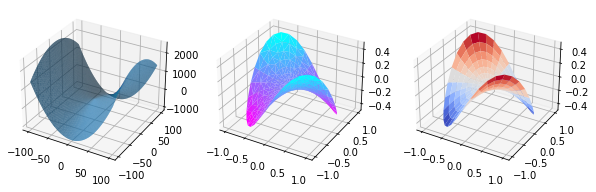

In [21]:
# 使用plot_trisurf绘制马鞍面
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
x, y = np.meshgrid(x, y) # 还是需要先生成网格
X = x.flatten()
Y = y.flatten()
Z = np.power(X, 2)/4 - np.power(Y, 2)/9

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), subplot_kw={"projection":'3d'})
ax1.plot_trisurf(X, Y, Z)

# 另一种生成网格的方式：极坐标网格
radii = np.linspace(0.125, 1.0, 8)  # 这是半径r
angles = np.linspace(0, 2*np.pi, 36, endpoint=True)[..., np.newaxis] # 这是角度，endpint=True表示生成的点中包含端点
# 注意，需要添加[..., np.newaxis]，将angles扩展为二维，这样radii与angles相乘时才能使用numpy的广播机制

# 使用plot_trisurf进行绘制
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = np.sin(-x*y)
ax2.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, cmap=cm.cool_r)

# 改用plot_surface绘制
x = radii*np.cos(angles)
y = radii*np.sin(angles)
z = np.sin(-x*y)
ax3.plot_surface(x, y, z, cmap=cm.coolwarm)

plt.show()

In [28]:
import numpy as np
import random
np.random.rand(60)*0.77 +0.23
f = lambda x: np.exp(x)
# [f(i)/np.exp(1)+random.random()*0.1 for i in np.linspace(0, 0.9, 60)]
[f(i)/np.exp(1) for i in np.linspace(0, 0.9, 60)]

[0.36787944117144233,
 0.3735341811829443,
 0.37927584120415353,
 0.38510575729792546,
 0.3910252860639743,
 0.39703580495454893,
 0.40313871259496015,
 0.40933542910903614,
 0.4156273964495798,
 0.42201607873390606,
 0.4285029625845361,
 0.43508955747512873,
 0.44177739608173017,
 0.4485680346394209,
 0.45546305330444675,
 0.4624640565219145,
 0.4695726733991411,
 0.47679055808474013,
 0.48411939015353644,
 0.4915608749973969,
 0.4991167442220686,
 0.5067887560501171,
 0.514578695730058,
 0.5224883759517783,
 0.5305196372683418,
 0.5386743485242795,
 0.5469544072904623,
 0.5553617403056589,
 0.5638983039248807,
 0.5725660845746183,
 0.5813670992150757,
 0.590303395809509,
 0.5993770538007799,
 0.6085901845952346,
 0.6179449320540203,
 0.6274434729919531,
 0.6370880176840548,
 0.6468808103798761,
 0.6568241298257248,
 0.6669202897949214,
 0.6771716396262056,
 0.6875805647704194,
 0.6981494873455911,
 0.7088808667005546,
 0.7197771999872299,
 0.7308410227417008,
 0.7420749094742256,
 0.

0.39629135910509034


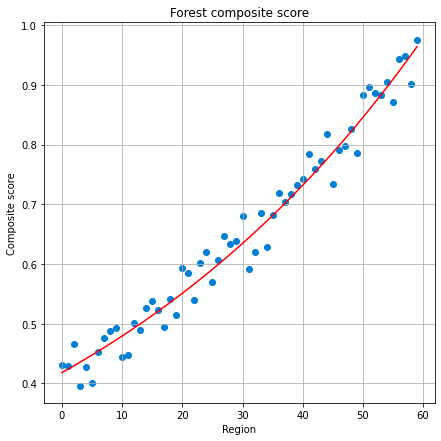

In [52]:
import matplotlib.pyplot as plt
c = np.arange(60)
a = [f(i)/np.exp(1)+random.random()*0.1 for i in np.linspace(0, 0.9, 60)]
b = [f(i)/np.exp(1)+0.05 for i in np.linspace(0, 0.91, 60)]



In [50]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(c, b, c='r')
ax.scatter(c, a, c= '#007fd4')
ax.set_xlabel('Region')
ax.set_ylabel('Composite score')
# 设置标题
ax.set_title('Forest composite score')
ax.grid(True)
print(np.min(a))

0.38969170624890925